# Overview
In this notebook, we will examine lightning strike data collected by the National Oceanic and Atmospheric Association (NOAA) for the year of 2018. To complete this notebook, we will:

Find the locations with the greatest number of strikes within a single day
Examine the locations that had the greatest number of days with at least one lightning strike
Determine whether certain days of the week had more lightning strikes than others
Add data from 2016 and 2017 and, for each month, calculate the percentage of total lightning strikes for that year that occurred in that month
Plot this data on a bar graph

In [1]:
# Import statements
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
from matplotlib import pyplot as plt

In [2]:
# Read in the data.
file_path = "../data/raw/NOAA_lightning_strikes_2009_to_2018.csv"
df = pd.read_csv(file_path)
df.head()

,date,number_of_strikes,x_coord,y_coord
0,2012-09-15,2,-68.8,49.5
1,2012-09-15,2,-85.7,22.8
2,2012-09-15,2,-95.6,25.8
3,2012-09-15,2,-79.5,26.0
4,2012-09-15,2,-88.7,29.1


In [3]:
# Convert the `date` column to datetime.
df['date'] = pd.to_datetime(df['date']) 

In [4]:
df.shape

(12875911, 4)

In [8]:
# Create the new column 'center_point_geom' with the specified format
df['center_point_geom'] = df.apply(lambda row: f"POINT({row['x_coord']} {row['y_coord']})", axis=1)

# Drop the 'x_coord' and 'y_coord' columns, as they're now part of 'center_point_geom'
df = df.drop(columns=['x_coord', 'y_coord'])

In [9]:
# Save the processed data to the specified path
processed_file_path = "../data/processed/NOAA_lightning_strikes_2009_to_2018.csv"
df.to_csv(processed_file_path, index=False)

print(f"Processed data saved to {processed_file_path}")

Processed data saved to ../data/processed/NOAA_lightning_strikes_2009_to_2018.csv


## Locations with most strikes in a single day
To identify the locations with the most strikes in a single day, we will sort the number_of_strikes column in descending value, or by most to least strikes.

In [10]:
# Sort by number of strikes in descending order.
df.center_point_geom.value_counts()

center_point_geom
POINT(-82.2 22.9)                                414
POINT(-82.4 22.9)                                408
POINT(-82.3 22.9)                                408
POINT(-82.1 22.9)                                401
POINT(-84.1 22.399999999999995)                  400
                                                ... 
POINT(-120.9 31.6)                                 1
POINT(-120.40000000000002 31.200000000000006)      1
POINT(-123.1 32.5)                                 1
POINT(-121.4 31.699999999999992)                   1
POINT(-122.7 30.300000000000004)                   1
Name: count, Length: 187690, dtype: int64

# Locations with most days with at least one lightning strike

To find the number of days that a given geographic location had at least one lightning strike, we will use the value_counts() function on the center_point_geom column. The logic is that if each row represents a location-day, then counting the number of times each location occurs in the data will give you the number of days that location had lightning.

In [7]:
# Identify the locations  that appear most in the dataset
df['x_coord'].value_counts()

x_coord
-81.6     39695
-81.7     39525
-81.8     39488
-81.5     39067
-81.9     38847
          ...  
-141.8        1
-140.3        1
-45.0         1
-140.2        1
-45.6         1
Name: count, Length: 1056, dtype: int64

Now we will examine whether there is an even distribution of values, or whether 108 strikes is an unusually high number of days with lightning strikes. We will use the `value_counts()` function again, but this time we will output the top 20 results. We will also rename the columns and apply a color gradient.

In [11]:
# Identify the top 20 locations with most days of lightning.
df.center_point_geom.value_counts()[:20].rename_axis('unique_values').reset_index(name='counts').style.background_gradient()

,unique_values,counts
0,POINT(-82.2 22.9),414
1,POINT(-82.4 22.9),408
2,POINT(-82.3 22.9),408
3,POINT(-82.1 22.9),401
4,POINT(-84.1 22.399999999999995),400
5,POINT(-82.5 22.9),399
6,POINT(-84.2 22.3),390
7,POINT(-82.60000000000001 22.9),389
8,POINT(-82.4 23.000000000000004),385
9,POINT(-82.2 22.8),382


In [14]:
# Create two new columns.
df['week'] = df.date.dt.isocalendar().week
df['weekday'] = df.date.dt.day_name()
df.head()

,date,number_of_strikes,center_point_geom,week,weekday
0,2012-09-15,2,POINT(-68.8 49.5),37,Saturday
1,2012-09-15,2,POINT(-85.7 22.8),37,Saturday
2,2012-09-15,2,POINT(-95.6 25.8),37,Saturday
3,2012-09-15,2,POINT(-79.5 26.0),37,Saturday
4,2012-09-15,2,POINT(-88.7 29.1),37,Saturday


In [15]:
# Calculate the mean count of lightning strikes for each weekday.
df[['weekday','number_of_strikes']].groupby(['weekday']).mean()

,number_of_strikes
weekday,
Friday,11.052528
Monday,11.005038
Saturday,10.436042
Sunday,10.553763
Thursday,11.323882
Tuesday,11.556884
Wednesday,10.929117


In [16]:
# Define order of days for the plot.
weekday_order = ['Monday','Tuesday', 'Wednesday', 'Thursday','Friday','Saturday','Sunday']

Text(0.5, 1.0, 'Lightning distribution per weekday (2018)')

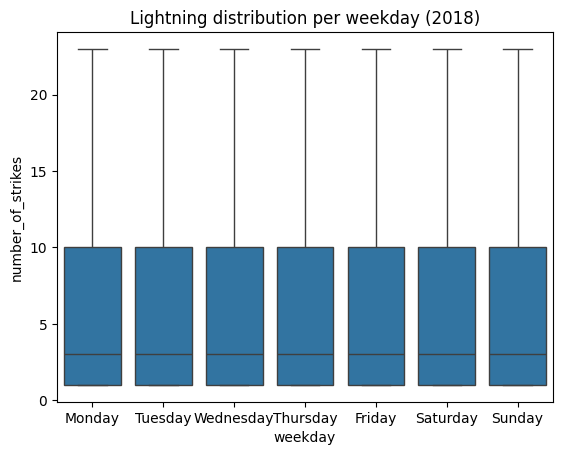

In [17]:
# Create boxplots of strike counts for each day of week.
g = sns.boxplot(data=df, 
            x='weekday',
            y='number_of_strikes', 
            order=weekday_order, 
            showfliers=False 
            );
g.set_title('Lightning distribution per weekday (2018)')